In [1]:
### Tutorial Overview
## 1.Make data more Gaussian
## 2.Power transformer
## 3.Sonar Dataset
## 4.Box-Cox Transform
## 5.Yeo-Johnson Transform

### Power Transforms

In [2]:
## common values for lambda
## lamda =-1  is a reciprocal transform
## lambda = -.0.5 is a reciprocal square root transform
## lambda = 0.0  is a log transform
## lamda = 0.5 is a square root transform
## lamda = 1 is no transform

D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


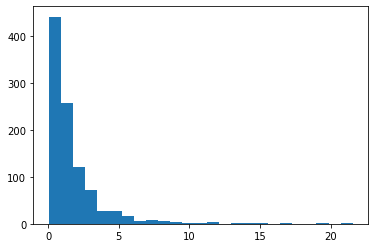

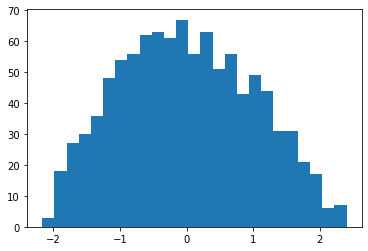

In [3]:
### demonstration of the power transform on data with a skew
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

data = np.random.randn(1000)

# add skew to the data 
data = np.exp(data)

## plot the historam
plt.hist(data,bins=25)

plt.show()

## reshape the data
data = data.reshape((len(data),1))

# power transform of raw data
power = PowerTransformer(method="yeo-johnson",standardize=True)
data_trans = power.fit_transform(data)

# hist of transformed data
plt.hist(data_trans,bins=25)
plt.show()



(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

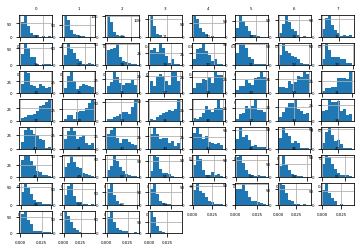

In [4]:
#### sonar dataset
dataset = pd.read_csv('../dataset/sonar.csv',header=None)
print(dataset.shape)
print(dataset.describe())

fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()


In [5]:
### evaluating KNN on raw data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# load dataset
dataset = pd.read_csv('../dataset/sonar.csv',header=None)

data = dataset.values

X = data[:,:-1]
y = data [:,-1]

le = LabelEncoder()
y = le.fit_transform(y.astype('str'))

model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores =cross_val_score(model,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

Accuracy is 0.797 (0.073)


#### Box-Cox Transform

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

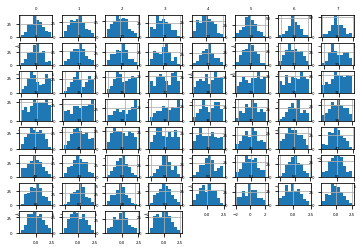

In [9]:
## Box - Cox procedure can only be applied to data that is strictly positive ( 0 or negative values are not supported)

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

dataset = pd.read_csv('../dataset/sonar.csv',header=None)
print(dataset.shape)
print(dataset.describe())

data = dataset.values[:,:-1]

transform = PowerTransformer(method="box-cox")
scaler = MinMaxScaler(feature_range=(1,2))
pipeline = Pipeline([('scaler',scaler),('tr',transform)])

data = pipeline.fit_transform(data)

dataset = pd.DataFrame(data)

fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()


In [11]:
### evaluating on KNN using box-cox 
# load dataset
dataset = pd.read_csv('../dataset/sonar.csv',header=None)

data = dataset.values

X = data[:,:-1]
y = data [:,-1]

le = LabelEncoder()
y = le.fit_transform(y.astype('str'))

model = KNeighborsClassifier()

transform = PowerTransformer(method="box-cox")
scaler = MinMaxScaler(feature_range=(1,2))

pipeline = Pipeline([('scaler',scaler),('tr',transform),('model',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores =cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

Accuracy is 0.811 (0.085)


#### Yeo-Johnson Transform

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

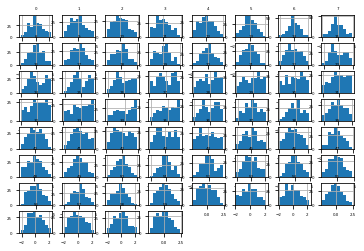

In [12]:
dataset = pd.read_csv('../dataset/sonar.csv',header=None)
print(dataset.shape)
print(dataset.describe())

data = dataset.values[:,:-1]

transform = PowerTransformer(method="yeo-johnson")
#scaler = MinMaxScaler(feature_range=(1,2))
pipeline = Pipeline([('tr',transform)])

data = pipeline.fit_transform(data)

dataset = pd.DataFrame(data)

fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()


In [13]:
## Evaluate using KNN
dataset = pd.read_csv('../dataset/sonar.csv',header=None)

data = dataset.values

X = data[:,:-1]
y = data [:,-1]

le = LabelEncoder()
y = le.fit_transform(y.astype('str'))

model = KNeighborsClassifier()

transform = PowerTransformer(method="yeo-johnson")
#scaler = MinMaxScaler(feature_range=(1,2))

pipeline = Pipeline([('tr',transform),('model',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores =cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

Accuracy is 0.808 (0.082)


In [14]:
## Evaluate with KNN using StandardSCaler and YEO-JOHNSON
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('../dataset/sonar.csv',header=None)

data = dataset.values

X = data[:,:-1]
y = data [:,-1]

le = LabelEncoder()
y = le.fit_transform(y.astype('str'))

model = KNeighborsClassifier()

transform = PowerTransformer(method="yeo-johnson")
scaler = StandardScaler()

pipeline = Pipeline([('sr',scaler),('tr',transform),('model',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores =cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

Accuracy is 0.816 (0.077)
